## Base Imports and Initialization

In [1385]:
# basic data visualization of nasdaq 100 data (pulled by Prasanth)

#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import time
import requests
import io
import os
from IPython.display import display

### Update Dataset to include Volume

In [455]:
start = datetime.datetime(2016,2,9)
end = datetime.datetime(2020,2,9)

In [456]:
Symbols= ["AAPL","MSFT","AMZN","TSLA","GOOG","FB","GOOGL","NVDA","PYPL","INTC","NFLX","ADBE","CMCSA","CSCO","PEP","AVGO","QCOM","TXN","COST","TMUS","AMGN","SBUX","CHTR","AMD","INTU","AMAT","MELI","MU","ISRG","BKNG","GILD","JD","MDLZ","ZM","ATVI","LRCX","BIDU","FISV","MRNA","ADP","CSX","ADSK","ILMN","ADI","PDD","VRTX","NXPI","REGN","WDAY","MNST","ALGN","KLAC","DOCU","KDP","EBAY","WBA","ROST","ASML","EXC","LULU","MTCH","IDXX","SNPS","MAR","KHC","BIIB","EA","NTES","CTSH","AEP","MCHP","DXCM","CDNS","PTON","CTAS","XLNX","MRVL","ALXN","OKTA","PCAR","PAYX","ANSS","ORLY","XEL","TEAM","SGEN","VRSK","SWKS","CPRT","FAST","SPLK","SIRI","DLTR","MXIM","CERN","VRSN","CDW","INCY","TCOM","CHKP","FOXA","FOX"]

In [457]:
stock_final = pd.DataFrame()
# iterate over each symbol
for i in Symbols:  
    
    # print the symbol which is being downloaded
    print( str(Symbols.index(i)) + str(' : ') + i, sep=',', end=',', flush=True)  
    
    try:
        # download the stock price 
        stock = []
        ticker = yf.Ticker(i)       
        stock = ticker.history(start=start, end=end, progress=False)
        
        # append the individual stock prices 
        if len(stock) == 0:
            None
        else:
            stock['Name']=i
            stock_final = stock_final.append(stock,sort=False)
    except Exception:
        None

0 : AAPL,1 : MSFT,2 : AMZN,3 : TSLA,4 : GOOG,5 : FB,6 : GOOGL,7 : NVDA,8 : PYPL,9 : INTC,10 : NFLX,11 : ADBE,12 : CMCSA,13 : CSCO,14 : PEP,15 : AVGO,16 : QCOM,17 : TXN,18 : COST,19 : TMUS,20 : AMGN,21 : SBUX,22 : CHTR,23 : AMD,24 : INTU,25 : AMAT,26 : MELI,27 : MU,28 : ISRG,29 : BKNG,30 : GILD,31 : JD,32 : MDLZ,33 : ZM,34 : ATVI,35 : LRCX,36 : BIDU,37 : FISV,38 : MRNA,39 : ADP,40 : CSX,41 : ADSK,42 : ILMN,43 : ADI,44 : PDD,45 : VRTX,46 : NXPI,47 : REGN,48 : WDAY,49 : MNST,50 : ALGN,51 : KLAC,52 : DOCU,53 : KDP,54 : EBAY,55 : WBA,56 : ROST,57 : ASML,58 : EXC,59 : LULU,60 : MTCH,61 : IDXX,62 : SNPS,63 : MAR,64 : KHC,65 : BIIB,66 : EA,67 : NTES,68 : CTSH,69 : AEP,70 : MCHP,71 : DXCM,72 : CDNS,73 : PTON,74 : CTAS,75 : XLNX,76 : MRVL,77 : ALXN,78 : OKTA,79 : PCAR,80 : PAYX,81 : ANSS,82 : ORLY,83 : XEL,84 : TEAM,85 : SGEN,86 : VRSK,87 : SWKS,88 : CPRT,89 : FAST,90 : SPLK,91 : SIRI,92 : DLTR,93 : MXIM,94 : CERN,95 : VRSN,96 : CDW,97 : INCY,98 : TCOM,99 : CHKP,100 : FOXA,101 : FOX,

In [458]:
print(stock_final)

                 Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2016-02-09  21.924989  22.308659  21.841279  22.087757  177324800        0.0   
2016-02-10  22.304010  22.403997  21.880810  21.920340  169374400        0.0   
2016-02-11  21.808724  22.024975  21.529691  21.787796  200298800        0.0   
2016-02-12  21.901739  21.973822  21.627357  21.855232  161405600        0.0   
2016-02-16  22.094733  22.520258  21.999398  22.471428  196231600        0.0   
...               ...        ...        ...        ...        ...        ...   
2020-02-03  35.936132  36.674546  35.847522  36.261036    1084600        0.0   
2020-02-04  36.694235  36.989599  36.418562  36.822227    1072200        0.0   
2020-02-05  37.225895  37.619713  36.871456  37.344040    1984500        0.0   
2020-02-06  37.668940  37.846159  35.621074  35.936131    2530200        0.0   
2020-02-07  35.886902  35.896746  35.335

In [459]:
change = np.insert(stock_final.iloc[1:]["Close"].values - stock_final.iloc[0:-1]["Close"].values, 0, [0])

In [460]:
stock_final["Change"] = change

In [461]:
os.remove('./nasdaq100.csv')
stock_final.to_csv('./nasdaq100.csv')

### Dataloading and Visualization

In [712]:
#read in the stock data
stock_data = pd.read_csv("./nasdaq100.csv")

In [902]:
from matplotlib import transforms as mtransforms
from dateutil.rrule import (rrule, MO, TU, WE, TH, FR, SA, SU, YEARLY,
                            MONTHLY, WEEKLY, DAILY, HOURLY, MINUTELY,
                            SECONDLY)
import matplotlib.dates as mdates

#note for any plot. Index must use pandas datetime. To Convert normal datetime to pandas datetime. Use pd.to_datetime(data)

class biWeekly(mdates.RRuleLocator):
    def __init__(self, byweek=None, byweekday=1, interval=1, tz=None):
        if byweek is None:
            byweek = range(1, 5)
        elif isinstance(bymonth, np.ndarray):
            # This fixes a bug in dateutil <= 2.3 which prevents the use of
            # numpy arrays in (among other things) the bymonthday, byweekday
            # and bymonth parameters.
            bymonth = [x.item() for x in bymonth.astype(int)]

        rule = mdates.rrulewrapper(DAILY, byweekno=range(1, 5),
                            interval=interval, **self.hms0d)
        mdates.RRuleLocator.__init__(self, rule, tz)

def getDateSpacer(spacer_type, interval):
    spacers= {
        "weekly": mdates.WeekdayLocator,
        "monthly": mdates.MonthLocator,
        "daily": mdates.DayLocator,
        "yearly": mdates.YearLocator
    }
    
    return spacers[spacer_type](interval=interval)

In [1010]:
nasdaq = yf.Ticker('^IXIC')

In [1011]:
start = datetime.datetime(1930,2,9)
end = datetime.datetime(2020,2,9)
nasdaq_data = nasdaq.history(period="max")

In [1012]:
nasdaq_data.index = pd.to_datetime(nasdaq_data.index)
nasdaq_data = nasdaq_data.loc["2010-01-01":]
nasdaq_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,1931380000,0,0
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2367860000,0,0
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2253340000,0,0
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2270050000,0,0
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2145390000,0,0
...,...,...,...,...,...,...,...
2021-02-08,13937.059570,13987.740234,13894.150391,13987.639648,8439940000,0,0
2021-02-09,13966.820312,14044.950195,13966.549805,14007.700195,8658980000,0,0
2021-02-10,14093.349609,14109.120117,13845.469727,13972.530273,10165550000,0,0


In [1014]:
nasdaq_data.index = pd.to_datetime(nasdaq_data.index)
nasdaq_data["Date"] = nasdaq_data.index
nasdaq_data["Volume in (1e8)"] = nasdaq_data["Volume"] / 1e6
nasdaq_data = nasdaq_data.loc[:, nasdaq_data.columns != "Volume"]
# nasdaq_data = nasdaq_data.loc[:, nasdaq_data.columns != "Volume"]
print(nasdaq_data)
# data = nasdaq_data[["Date", "Open", "High", "Low", "Close"]].melt(["Date"])
data = nasdaq_data.melt(["Date"])

                    Open          High           Low         Close  Dividends  \
Date                                                                            
2010-01-04   2294.409912   2311.149902   2294.409912   2308.419922          0   
2010-01-05   2307.270020   2313.729980   2295.620117   2308.709961          0   
2010-01-06   2307.709961   2314.070068   2295.679932   2301.090088          0   
2010-01-07   2298.090088   2301.300049   2285.219971   2300.050049          0   
2010-01-08   2292.239990   2317.600098   2290.610107   2317.169922          0   
...                  ...           ...           ...           ...        ...   
2021-02-08  13937.059570  13987.740234  13894.150391  13987.639648          0   
2021-02-09  13966.820312  14044.950195  13966.549805  14007.700195          0   
2021-02-10  14093.349609  14109.120117  13845.469727  13972.530273          0   
2021-02-11  14045.209961  14058.910156  13916.849609  14025.769531          0   
2021-02-12  13979.209961  14

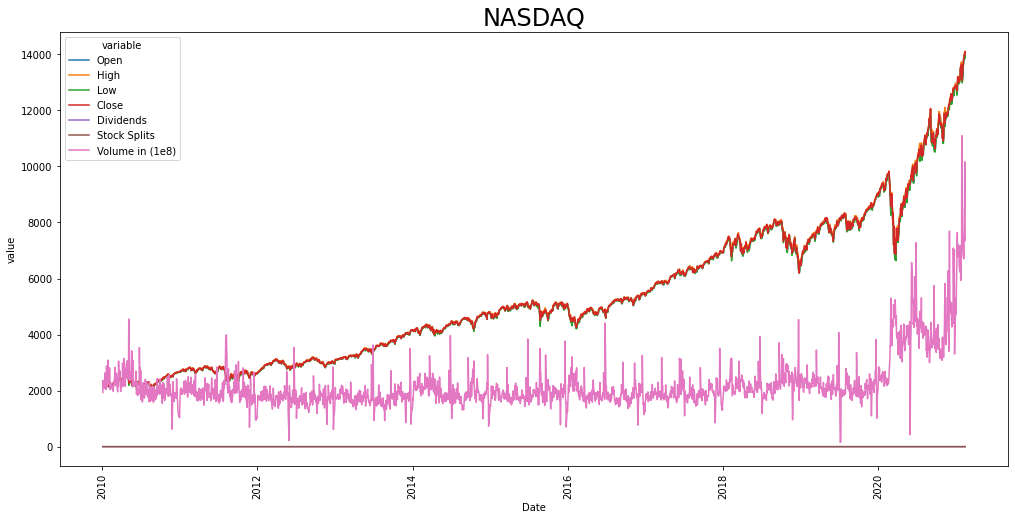

In [1015]:
fig, ax = plt.subplots(figsize=(17, 8))
plt.ion()
sns.lineplot(
    ax=ax,
    x="Date", y="value", 
    hue="variable", data=data
)
ax.set_title("NASDAQ", size=24)
ax.tick_params(axis='x',which='major', rotation=90)

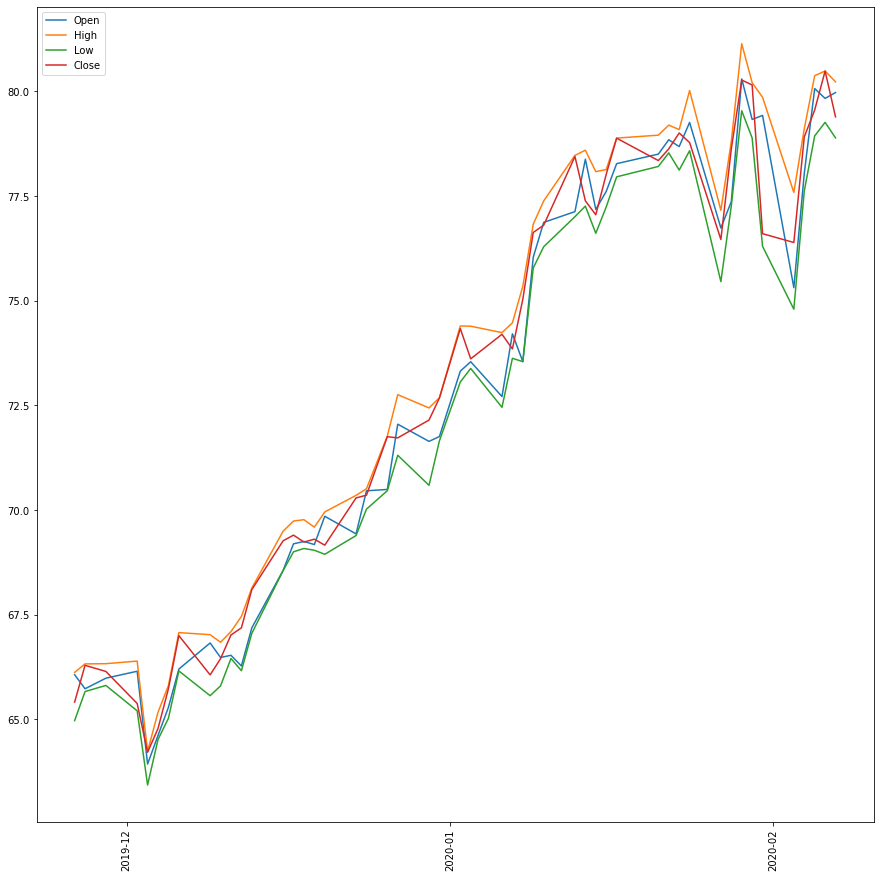

In [901]:
#get a rough idea of the stock data
#print(stock_data)
import matplotlib.dates as mdates

apple_data = stock_data[stock_data["Name"]=="AAPL"][-50:]

fig = plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
plt.plot(pd.to_datetime(apple_data["Date"]), apple_data[["Open", "High", "Low", "Close"]])
ticks = plt.xticks()
# print(ticks)
plt.legend(labels=["Open", "High", "Low", "Close"], loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

<ipython-input-1019-466611a90972>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data["Date"] = pd.to_datetime(relevant_data["Date"])


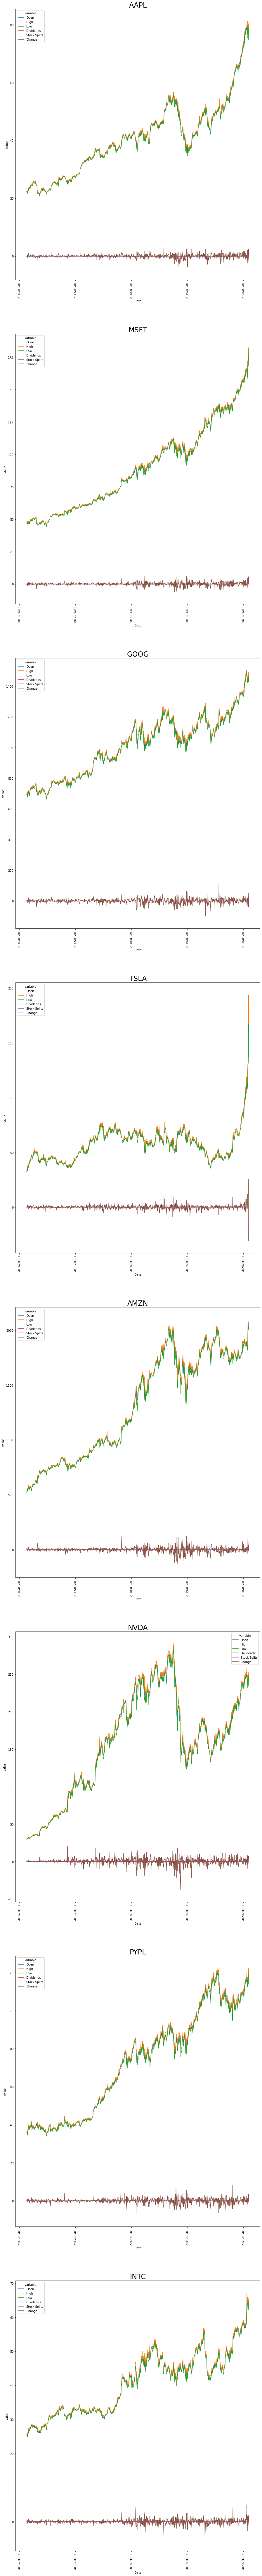

In [1019]:
interesting_tickers = ["AAPL", "MSFT", "GOOG", "TSLA", "AMZN", "NVDA", "PYPL", "INTC"]

size = len(interesting_tickers)

fig, axs = plt.subplots(nrows=size, ncols=1, figsize=(15, 20 * size))

relevant_data = stock_data[stock_data["Name"].isin(interesting_tickers)]
relevant_data["Date"] = pd.to_datetime(relevant_data["Date"])

for i, ticker in enumerate(interesting_tickers):
    data = relevant_data[relevant_data["Name"]==ticker][-1000:].melt(["Date", "Close", "Volume", "Name"])
    plt.xticks(rotation=90)
    sns.lineplot(
        ax=axs[i],
        x="Date", y="value", 
        hue="variable", data=data
    )
    axs[i].set_title(ticker, size=24)
    axs[i].tick_params(axis='x',which='major', rotation=90)
    axs[i].xaxis.set_major_locator(mdates.YearLocator())



## Utils

### EMA Function

In [489]:
def ewma_vectorized(data, alpha, offset=None, dtype=None, order='C', out=None):
    """
    Calculates the exponential moving average over a vector.
    Will fail for large inputs.
    :param data: Input data
    :param alpha: scalar float in range (0,1)
        The alpha parameter for the moving average.
    :param offset: optional
        The offset for the moving average, scalar. Defaults to data[0].
    :param dtype: optional
        Data type used for calculations. Defaults to float64 unless
        data.dtype is float32, then it will use float32.
    :param order: {'C', 'F', 'A'}, optional
        Order to use when flattening the data. Defaults to 'C'.
    :param out: ndarray, or None, optional
        A location into which the result is stored. If provided, it must have
        the same shape as the input. If not provided or `None`,
        a freshly-allocated array is returned.
    """
    data = np.array(data, copy=False)

    if dtype is None:
        if data.dtype == np.float32:
            dtype = np.float32
        else:
            dtype = np.float64
    else:
        dtype = np.dtype(dtype)

    if data.ndim > 1:
        # flatten input
        print(data.reshape(-1))
        data = data.reshape(-1, order=order)

    if out is None:
        out = np.empty_like(data, dtype=dtype)
    else:
        assert out.shape == data.shape
        assert out.dtype == dtype

    if data.size < 1:
        # empty input, return empty array
        return out

    if offset is None:
        offset = data[0]

    alpha = np.array(alpha, copy=False).astype(dtype, copy=False)

    # scaling_factors -> 0 as len(data) gets large
    # this leads to divide-by-zeros below
    scaling_factors = np.power(1. - alpha, np.arange(data.size + 1, dtype=dtype),
                               dtype=dtype)
    # create cumulative sum array
    np.multiply(data, (alpha * scaling_factors[-2::-1]),
                dtype=dtype, out=out)
    np.cumsum(out, dtype=dtype, out=out)

    # cumsums / scaling
    out /= scaling_factors[-2::-1]

    if offset != 0:
        offset = np.array(offset, copy=False).astype(dtype, copy=False)
        # add offsets
        out += offset * scaling_factors[1:]

    return out

In [490]:
def ewma_vectorized_2d(data, alpha, axis=None, offset=None, dtype=None, order='C', out=None):
    """
    Calculates the exponential moving average over a given axis.
    :param data: Input data, must be 1D or 2D array.
    :param alpha: scalar float in range (0,1)
        The alpha parameter for the moving average.
    :param axis: The axis to apply the moving average on.
        If axis==None, the data is flattened.
    :param offset: optional
        The offset for the moving average. Must be scalar or a
        vector with one element for each row of data. If set to None,
        defaults to the first value of each row.
    :param dtype: optional
        Data type used for calculations. Defaults to float64 unless
        data.dtype is float32, then it will use float32.
    :param order: {'C', 'F', 'A'}, optional
        Order to use when flattening the data. Ignored if axis is not None.
    :param out: ndarray, or None, optional
        A location into which the result is stored. If provided, it must have
        the same shape as the desired output. If not provided or `None`,
        a freshly-allocated array is returned.
    """
    data = np.array(data, copy=False)

    assert data.ndim <= 2

    if dtype is None:
        if data.dtype == np.float32:
            dtype = np.float32
        else:
            dtype = np.float64
    else:
        dtype = np.dtype(dtype)

    if out is None:
        out = np.empty_like(data, dtype=dtype)
    else:
        assert out.shape == data.shape
        assert out.dtype == dtype

    if data.size < 1:
        # empty input, return empty array
        return out

    if axis is None or data.ndim < 2:
        # use 1D version
        if isinstance(offset, np.ndarray):
            offset = offset[0]
        return ewma_vectorized(data, alpha, offset, dtype=dtype, order=order,
                               out=out)

    assert -data.ndim <= axis < data.ndim

    # create reshaped data views
    out_view = out
    if axis < 0:
        axis = data.ndim - int(axis)

    if axis == 0:
        # transpose data views so columns are treated as rows
        data = data.T
        out_view = out_view.T

    if offset is None:
        # use the first element of each row as the offset
        offset = np.copy(data[:, 0])
    elif np.size(offset) == 1:
        offset = np.reshape(offset, (1,))

    alpha = np.array(alpha, copy=False).astype(dtype, copy=False)

    # calculate the moving average
    row_size = data.shape[1]
    row_n = data.shape[0]
    scaling_factors = np.power(1. - alpha, np.arange(row_size + 1, dtype=dtype),
                               dtype=dtype)
    # create a scaled cumulative sum array
    np.multiply(
        data,
        alpha * scaling_factors[-2::-1],
        dtype=dtype, out=out_view
    )
    np.cumsum(out_view, axis=1, dtype=dtype, out=out_view)
    out_view /= scaling_factors[np.newaxis, -2::-1]

    if not (np.size(offset) == 1 and offset == 0):
        offset = offset.astype(dtype, copy=False)
        # add the offsets to the scaled cumulative sums
        out_view += offset[:, np.newaxis] * scaling_factors[np.newaxis, 1:]

    return out

In [491]:
def ewma_vectorized_safe(data, alpha, row_size=None, dtype=None, order='C', out=None):
    """
    Reshapes data before calculating EWMA, then iterates once over the rows
    to calculate the offset without precision issues
    :param data: Input data, will be flattened.
    :param alpha: scalar float in range (0,1)
        The alpha parameter for the moving average.
    :param row_size: int, optional
        The row size to use in the computation. High row sizes need higher precision,
        low values will impact performance. The optimal value depends on the
        platform and the alpha being used. Higher alpha values require lower
        row size. Default depends on dtype.
    :param dtype: optional
        Data type used for calculations. Defaults to float64 unless
        data.dtype is float32, then it will use float32.
    :param order: {'C', 'F', 'A'}, optional
        Order to use when flattening the data. Defaults to 'C'.
    :param out: ndarray, or None, optional
        A location into which the result is stored. If provided, it must have
        the same shape as the desired output. If not provided or `None`,
        a freshly-allocated array is returned.
    :return: The flattened result.
    """
    data = np.array(data, copy=False)

    if dtype is None:
        if data.dtype == np.float32:
            dtype = np.float32
        else:
            dtype = np.float
    else:
        dtype = np.dtype(dtype)

    row_size = int(row_size) if row_size is not None else get_max_row_size(alpha, dtype)

    if data.size <= row_size:
        # The normal function can handle this input, use that
        return ewma_vectorized(data, alpha, offset=0, dtype=dtype, order=order,out=out)

    if data.ndim > 1:
        # flatten input
        data = np.reshape(data, -1, order=order)

    if out is None:
        out = np.empty_like(data, dtype=dtype)
    else:
        assert out.shape == data.shape
        assert out.dtype == dtype

    row_n = int(data.size // row_size)  # the number of rows to use
    trailing_n = int(data.size % row_size)  # the amount of data leftover
    first_offset = data[0]

    if trailing_n > 0:
        # set temporary results to slice view of out parameter
        out_main_view = np.reshape(out[:-trailing_n], (row_n, row_size))
        data_main_view = np.reshape(data[:-trailing_n], (row_n, row_size))
    else:
        out_main_view = out
        data_main_view = data

    # get all the scaled cumulative sums with 0 offset
    ewma_vectorized_2d(data_main_view, alpha, axis=1, offset=0, dtype=dtype,
                       order='C', out=out_main_view)

    scaling_factors = (1 - alpha) ** np.arange(1, row_size + 1)
    last_scaling_factor = scaling_factors[-2]

    # create offset array
    offsets = np.empty(out_main_view.shape[0], dtype=dtype)
    offsets[0] = 0
    # iteratively calculate offset for each row
    if(out_main_view.ndim >= 2):
        for i in range(1, out_main_view.shape[0]):
            offsets[i] = offsets[i - 1] * last_scaling_factor + out_main_view[i - 1, -1]
        
        # add the offsets to the result
        out_main_view += offsets[:, np.newaxis] * scaling_factors[np.newaxis, :]

    if trailing_n > 0:
        # process trailing data in the 2nd slice of the out parameter
        ewma_vectorized(data[-trailing_n:], alpha, offset=out_main_view[-1, -1],
                        dtype=dtype, order='C', out=out[-trailing_n:])
    else:
        out = out_main_view
    return out

def get_max_row_size(alpha, dtype=float):
    assert 0. <= alpha < 1.
    # This will return the maximum row size possible on 
    # your platform for the given dtype. I can find no impact on accuracy
    # at this value on my machine.
    # Might not be the optimal value for speed, which is hard to predict
    # due to numpy's optimizations
    # Use np.finfo(dtype).eps if you  are worried about accuracy
    # and want to be extra safe.
    epsilon = np.finfo(dtype).tiny
    # If this produces an OverflowError, make epsilon larger
    return int(np.log(epsilon)/np.log(1-alpha)) + 1

### RSI Function

In [1318]:
def relative_strength_index(gains, losses, period=None):
    #convert gains and losses to positive values (rsi will be incorrect otherwise). Losses may be negative if user hasn't run absolute over price change data
    gains = np.abs(gains)
    losses = np.abs(losses)
    
    #flattening if not 1D arrays
    if(len(gains.shape) > 1):
        gains = gains.flatten()
    if(len(losses.shape) > 1):
        losses = losses.flatten()
    
    #getting period / checking for same size for period, gains, losses
    if(period is None):
        if(gains.shape == losses.shape):
            period = gains.shape[-1]
        else:
            raise Exception("Gains and Losses must have the same size for accurate RSI calculation")
    
    elif(gains.shape[-1] != period or losses.shape[-1] != period):
        raise Exception("Gains and Losses array must have same size as period for an accurate RSI calculation")
       
    #actual RSI calculation 
    alpha = 1. / period
    
    gains_emwa = ewma_vectorized_safe(gains, alpha)[-1]
    losses_emwa = ewma_vectorized_safe(losses, alpha)[-1]
    
    with np.errstate(divide='ignore'):
        relative_strength = gains_emwa / losses_emwa
    
    return 100 - (100 / (1 + relative_strength))

### MFI Function

In [1258]:
def money_flow_index(flow_types, raw_money_flow=None, typical_price=None, volume=None):
    if(raw_money_flow is None):
        if(typical_price is None or volume is None):
            raise Exception("If raw_money_flow is none, typical price and volume must be defined")
        raw_money_flow = typical_price * volume
    
    positive_flow = raw_money_flow[flow_types].sum()
    negative_flow = raw_money_flow[~flow_types].sum()
    
    with np.errstate(divide='ignore'):
        money_flow = positive_flow / negative_flow
    
    return 100 - (100 / (1 + money_flow))

## Data Preprocessing

### Add Indicator Functions

In [1253]:
def vectorized_windows(data, sub_window_size, clearing_time_index=None, max_time=None,
                         stride_size=1, use_index_name=True, prefix="_"):
    """
    Args:
        data (np.array, pd.DataFrame): data to create sliding windows over
        sub_window_size (int): size of windows
        clearing_time_index (int): Value C. Initial starting point if we name each window on its final value. So a window of [1, 2, 3, 4, 5] would have name 5. This name is equal to C, or the clearing_time_index
        max_time (int): Max distance between clearing_time_index and final value to be included in a window. Final_value = Clearing_time_index + max_value
        stride_size (int): Size of stride when shifting windows (this result in space between windows = stride - 1)
    
    """
    
    columns = None
    data_index = None
    dtypes = data.dtypes
    
    if(sub_window_size > len(data)):
        raise Exception("Your selected window is too large")
    
    if(clearing_time_index is None):
        clearing_time_index = sub_window_size - 1
    else:
        #smallest clearing_time_index will be one less than sub_window_size (0 indexing). Thus min value is -1.
        if(clearing_time_index - sub_window_size < -1):
            raise Exception("Your starting value is too small")
    
    #get max time (endpoint of our windows) if it does not exist
    if(max_time is None):
            
        max_time = (len(data) - 1) - clearing_time_index
    else:
        if(max_time > ((len(data) - 1) - clearing_time_index)):
            raise Exception("Your max_time is too large. This will cause an error as this \
                            function will then try to select values outside the array to try and make complete windows.")
        
    if(type(data) == pd.DataFrame):
        columns = data.columns
        data_index = data.index
        data = data.to_numpy()
        
    start = clearing_time_index - sub_window_size + 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        # Create a rightmost vector as [0, V, 2V, ...].
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
    )
    
#     print(max_time)
#     print(sub_window_size)
#     print(sub_windows)
#     print(data)

    res = data[sub_windows]
    if(columns is not None):
        names=["window", "point", "value"]
        index = pd.MultiIndex.from_product([range(s)for s in res.shape], names=names)
        if use_index_name:
            range_stop = clearing_time_index + max_time + 1
            relevant_indices = data_index[clearing_time_index:range_stop:stride_size]
            index = index.set_levels(relevant_indices, level=0)
        df = pd.DataFrame({"res":res.flatten()}, index=index)["res"]
        df = df.unstack(level="value")
        df.columns = [prefix + column for column in columns]
        df = df.astype({prefix + column: dtypes[column] for column in columns})
        return df
    else:
        return res

In [1319]:
def windows(d, w, t=1, use_index_name=False, prefix="_"):
    r = np.arange(len(d))
    # len(d) - w is last point we can start a window since any point after won't have w amount of points
    # add one since slices are non-inclusive
    s = r[:(len(d) - w + 1):t]
    #s is first value to get. s + w - 1 is last value to get.
    z = list(zip(s, s + w - 1))
    z_indexes = map(lambda v: (d.iloc[v[0]].name, d.iloc[v[1]].name), z) if use_index_name else z
    # use '{0[0]}:{0[1]} to display range of values'. Here we just need endpoint since our indicators our for the endpoint day
    f = '{0[1]}'.format
    #map of windows (dataframe)
    #since end not-inclusive for py ranges, we add 1 to get the last value.
    g = lambda t: d.iloc[t[0]:(t[1] + 1)]
    
    #concat together, giving keyname of start:end
    concat = pd.concat(map(g, z), keys=map(f, z_indexes), names=("window", "point"))
    print(concat)
    concat.columns = [prefix + column for column in d.columns]
    
    return concat
    
    # NOTE: This automatically drops any incomplete windows (only returns complete versions)
    

def moving_avg(data, days=14):
    return vectorized_windows(data, days, prefix=f"SMA{days}_", use_index_name=True).groupby('window').mean()

def macd(data, days_short=12, days_long=26, days_signal=9, smoothing=2):
    def ewma_aggregate(data, days, smoothing = smoothing):
        alpha = smoothing / (1 + days)
        return ewma_vectorized_safe(data.values, alpha)[-1]
    #note both must have the same prefix to make subtraction operations work (pandas uses columns names when finding the np arrays to operate on)
    macd_data = {
        f"{days_short}_day": vectorized_windows(data, days_short, prefix="macd_", use_index_name=True).groupby('window').agg(lambda data: ewma_aggregate(data, days_short)),
        f"{days_long}_day": vectorized_windows(data, days_long, prefix="macd_", use_index_name=True).groupby('window').agg(lambda data: ewma_aggregate(data, days_long))
    }
    
    #offset = period of long ewma - period of short ewma = 26 - 12 = 14
    diff = days_long - days_short
    macd = macd_data[f"{days_short}_day"][diff:] - macd_data[f"{days_long}_day"]
    signal = vectorized_windows(macd, days_signal, use_index_name=True, prefix="signal_").groupby('window').agg(lambda data: ewma_aggregate(data, days_signal))
    
    return pd.merge(macd, signal, on="window")

def rsi(data, days=14):
    def rsi_aggregate(data, period=days):
        gains = data.where(data > 0, 0)
        #rsi needs positive values
        losses = np.abs(data.where(data < 0, 0))
        return relative_strength_index(gains, losses, period)
    
    #NOTE: data should only contain change in value column (so only 1 column)
    #using 14 day period

    change_windows = vectorized_windows(data, days, prefix="rsi_", use_index_name=True)
    return change_windows.groupby('window').agg(lambda data: rsi_aggregate(data))
    
def mfi(data, days=14, keys={"high":"high", "low":"low", "close":"close", "volume": "volume", "typical_price": "typical_price"}):
    def mfi_aggregate(data, keys={"raw_money_flow": "raw_money_flow", "flow_types": "flow_types"}):
        return money_flow_index(data[keys["flow_types"]], raw_money_flow=data[keys["raw_money_flow"]])
    
    if "typical_price" not in keys:
        typical_price = data[keys["high"]] + data[keys["low"]] + data[keys["close"]] / 3
    else:
        typical_price = data[keys["typical_price"]]
    volume = data[keys["volume"]]
    raw_money_flow = typical_price * volume
    flow_types = typical_price.iloc[1:].values > typical_price.iloc[:-1].values
    
    money_flow_df = pd.DataFrame({
        "raw_money_flow": raw_money_flow[1:],
        "flow_types": flow_types
    })
    res = vectorized_windows(money_flow_df, days, use_index_name=True, prefix="").groupby('window').apply(lambda data: mfi_aggregate(data))
    #by default res is a series (pd behaviour for apply)
    res = pd.DataFrame({"mfi": res})
    return res

indicators = {
    "ma": moving_avg,
    "macd": macd,
    "rsi": rsi,
    "mfi": mfi
}

#calc ma (50, 100, 150, 200).  
def get_indicator(indicator, data, values=None, days=None, keys=None):
    """
    Args:
        indicator (str): Type of Indicator to use
        days (int): Number of days to calculate indicator for
        data (pandas Dataframe): The Dateframe in which our data is located
        values (list[str]): Data Columns to find indicator for.
        keys (dict[str]): Relevant Columns to use in calculate (specific to indicator)
        
    Returns:
        Series: A Series containing the new data
    
    """
    
    if days is not None:
        if days > len(data):
            raise Exception("Days cannot be greater than the length of data")
    
    if(keys is None):
        if values:
            data = data[values]
        if(days is None):
            res = indicators[indicator](data) 
        elif(indicator == 'macd'):
            res = indicators[indicator](data, days_short=days, days_long=days + 14)
        else:
            res = indicators[indicator](data, days)
    else:
        data = data[keys.values()]
        res = indicators[indicator](data, keys=keys) if days is None else indicators[indicator](data, days, keys=keys)
        
    return res
    
    
    
    

df = pd.DataFrame({
    "typical_price": np.random.rand(100),
    "volume": np.random.randint(low=0, high=10000, size=(100))
}, index=np.arange(1, 101))

In [1281]:
df = pd.DataFrame({
    "typical_price": np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]),
    "volume": np.array([1, 2, 3, 4, 5, 6, 5, 8, 8, 8, 19, 14, 15, 16, 17, 19])
})

get_indicator("mfi", df)

,mfi
window,
14,100.0
15,100.0


### Use Functions to Add Extra Indicators to Stock Data

#### Add in typical price

In [1329]:
stock_data["Typical_Price"] = (stock_data["High"] + stock_data["Low"] + stock_data["Close"]) / 3

In [1029]:
stock_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Change,Typical_Price
0,2016-02-09,21.924989,22.308659,21.841279,22.087757,177324800,0.0,0.0,AAPL,0.000000,51.512524
1,2016-02-10,22.304010,22.403997,21.880810,21.920340,169374400,0.0,0.0,AAPL,-0.167418,51.591587
2,2016-02-11,21.808724,22.024975,21.529691,21.787796,200298800,0.0,0.0,AAPL,-0.132544,50.817264
3,2016-02-12,21.901739,21.973822,21.627357,21.855232,161405600,0.0,0.0,AAPL,0.067436,50.886256
4,2016-02-16,22.094733,22.520258,21.999398,22.471428,196231600,0.0,0.0,AAPL,0.616196,52.010132
...,...,...,...,...,...,...,...,...,...,...,...
97255,2020-02-03,35.936132,36.674546,35.847522,36.261036,1084600,0.0,0.0,FOX,0.492279,84.609080
97256,2020-02-04,36.694235,36.989599,36.418562,36.822227,1072200,0.0,0.0,FOX,0.561192,85.682237
97257,2020-02-05,37.225895,37.619713,36.871456,37.344040,1984500,0.0,0.0,FOX,0.521812,86.939182
97258,2020-02-06,37.668940,37.846159,35.621074,35.936131,2530200,0.0,0.0,FOX,-1.407909,85.445944


#### Get all indicators

In [1330]:
#for sma and macd
stock_prices = stock_data[["Open", "High", "Low", "Close"]]

#for rsi
price_change = stock_data[["Change"]]

#for mfi
money_flow = stock_data[["Typical_Price", "Volume"]]

In [1262]:
#simple moving averages
sma_50_df = get_indicator("ma", stock_prices, days=50)
sma_100_df = get_indicator("ma", stock_prices, days=100)
sma_200_df = get_indicator("ma", stock_prices, days=200)

#macd
macd_df = get_indicator("macd", stock_prices)

#rsi
rsi_df = get_indicator("rsi", price_change)

#mfi
mfi_df = get_indicator("mfi", money_flow, keys={"volume": "Volume", "typical_price": "Typical_Price"})

In [1331]:
mfi_df = get_indicator("mfi", money_flow, keys={"volume": "Volume", "typical_price": "Typical_Price"})
#making some adjustments
# rsi_df.columns=["rsi"]

In [1376]:
stock_data_copy = stock_data.copy()

for df in [sma_50_df, sma_100_df, sma_200_df, macd_df, rsi_df, mfi_df]:
    stock_data_copy = stock_data_copy.join(df, how="inner") 

In [1384]:
from IPython.display import display
display(stock_data_copy)
display(stock_data_copy[stock_data_copy["Name"] == "AAPL"])
display(stock_data_copy[["Close", "Typical_Price"]])

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Change,...,macd_Open,macd_High,macd_Low,macd_Close,signal_macd_Open,signal_macd_High,signal_macd_Low,signal_macd_Close,rsi,mfi
0,2016-11-21,26.034339,26.476440,26.008333,26.414972,117058400,0.0,0.0,AAPL,0.394825,...,-0.305967,-0.256058,-0.278560,-0.231701,-0.345166,-0.309871,-0.363382,-0.316960,58.185425,44.957200
1,2016-11-22,26.466980,26.578096,26.336951,26.431519,103862000,0.0,0.0,AAPL,0.016546,...,-0.205306,-0.178899,-0.174015,-0.150228,-0.307112,-0.274658,-0.315094,-0.274243,58.321877,50.284190
2,2016-11-23,26.327494,26.362957,26.083984,26.296761,109705600,0.0,0.0,AAPL,-0.134758,...,-0.137689,-0.131280,-0.112255,-0.100216,-0.263216,-0.236475,-0.262030,-0.228287,57.459604,50.217777
3,2016-11-25,26.273115,26.448065,26.230560,26.429152,45903600,0.0,0.0,AAPL,0.132391,...,-0.087921,-0.089943,-0.057832,-0.050838,-0.216761,-0.196611,-0.208081,-0.181059,62.076215,54.479414
4,2016-11-28,26.344042,26.589916,26.334585,26.377140,108776000,0.0,0.0,AAPL,-0.052011,...,-0.038625,-0.042021,0.009237,-0.012844,-0.168976,-0.153880,-0.149850,-0.134116,57.992028,54.020186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97056,2020-02-03,35.936132,36.674546,35.847522,36.261036,1084600,0.0,0.0,FOX,0.492279,...,-0.017654,0.031153,-0.039018,0.002970,0.096807,0.117529,0.044153,0.083215,51.736885,52.475240
97057,2020-02-04,36.694235,36.989599,36.418562,36.822227,1072200,0.0,0.0,FOX,0.561192,...,0.028208,0.040796,0.012069,0.025507,0.071837,0.089665,0.026223,0.058717,56.781337,51.717531
97058,2020-02-05,37.225895,37.619713,36.871456,37.344040,1984500,0.0,0.0,FOX,0.521812,...,0.080517,0.085293,0.058839,0.074765,0.061071,0.075898,0.022559,0.050873,60.797761,54.205562
97059,2020-02-06,37.668940,37.846159,35.621074,35.936131,2530200,0.0,0.0,FOX,-1.407909,...,0.150659,0.139829,-0.004479,-0.001844,0.068054,0.078374,0.010360,0.032948,40.734566,44.479276


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Change,...,macd_Open,macd_High,macd_Low,macd_Close,signal_macd_Open,signal_macd_High,signal_macd_Low,signal_macd_Close,rsi,mfi
0,2016-11-21,26.034339,26.476440,26.008333,26.414972,117058400,0.0000,0.0,AAPL,0.394825,...,-0.305967,-0.256058,-0.278560,-0.231701,-0.345166,-0.309871,-0.363382,-0.316960,58.185425,44.957200
1,2016-11-22,26.466980,26.578096,26.336951,26.431519,103862000,0.0000,0.0,AAPL,0.016546,...,-0.205306,-0.178899,-0.174015,-0.150228,-0.307112,-0.274658,-0.315094,-0.274243,58.321877,50.284190
2,2016-11-23,26.327494,26.362957,26.083984,26.296761,109705600,0.0000,0.0,AAPL,-0.134758,...,-0.137689,-0.131280,-0.112255,-0.100216,-0.263216,-0.236475,-0.262030,-0.228287,57.459604,50.217777
3,2016-11-25,26.273115,26.448065,26.230560,26.429152,45903600,0.0000,0.0,AAPL,0.132391,...,-0.087921,-0.089943,-0.057832,-0.050838,-0.216761,-0.196611,-0.208081,-0.181059,62.076215,54.479414
4,2016-11-28,26.344042,26.589916,26.334585,26.377140,108776000,0.0000,0.0,AAPL,-0.052011,...,-0.038625,-0.042021,0.009237,-0.012844,-0.168976,-0.153880,-0.149850,-0.134116,57.992028,54.020186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,2020-02-03,75.311101,77.585531,74.796326,76.390160,173985600,0.0000,0.0,AAPL,-0.210358,...,0.843381,0.927804,0.650097,0.702824,1.177261,1.165103,1.068338,1.056270,40.179211,43.341541
804,2020-02-04,78.035963,79.107598,77.620183,78.912079,136616400,0.0000,0.0,AAPL,2.521919,...,0.707391,0.805569,0.566914,0.653738,1.028868,1.040682,0.914032,0.924333,54.331907,50.677224
805,2020-02-05,80.067847,80.374740,78.936826,79.555550,118826800,0.0000,0.0,AAPL,0.643471,...,0.746208,0.786634,0.583855,0.631768,0.919467,0.939677,0.795855,0.815922,57.465919,56.677561
806,2020-02-06,79.832738,80.488584,79.261038,80.486107,105425600,0.0000,0.0,AAPL,0.930557,...,0.731379,0.758306,0.594208,0.686343,0.830244,0.853603,0.704921,0.742098,59.703657,56.670889


,Close,Typical_Price
0,26.414972,26.299915
1,26.431519,26.448855
2,26.296761,26.247901
3,26.429152,26.369259
4,26.377140,26.433880
...,...,...
97056,36.261036,36.261035
97057,36.822227,36.743463
97058,37.344040,37.278403
97059,35.936131,36.467788


#### Print sample of new indicator data

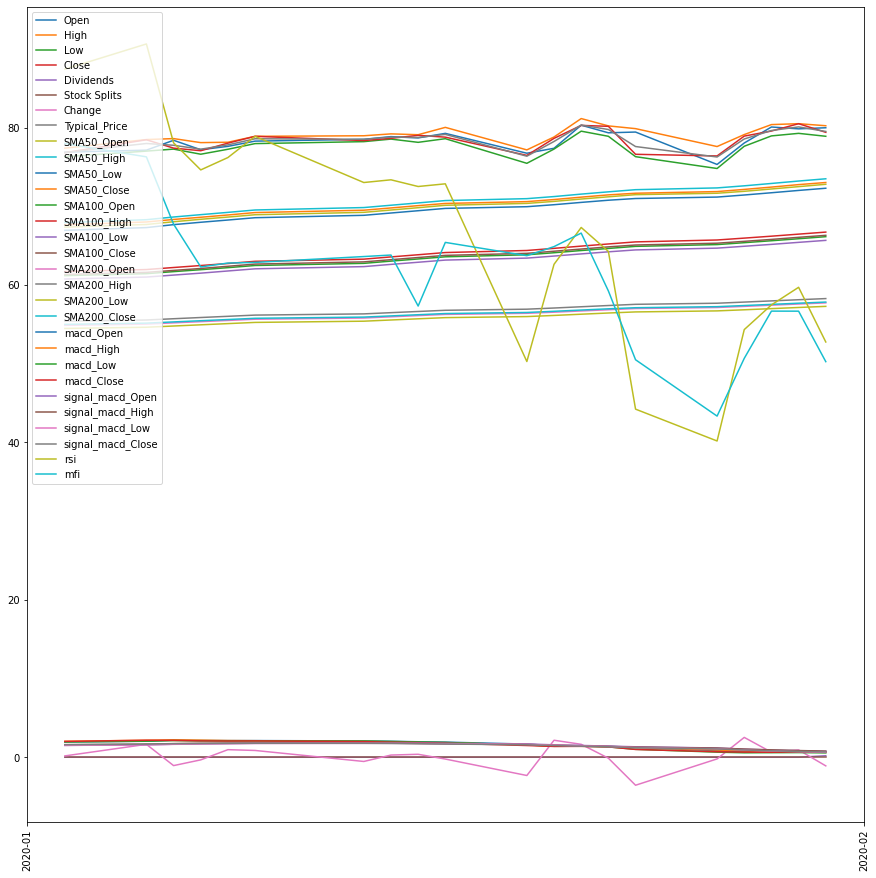

In [1360]:
fig = plt.figure(figsize=(15, 15))
plt.xticks(rotation=90)
apple_data = stock_data_copy[stock_data_copy["Name"] == "AAPL"].iloc[-20:]
apple_numeric = apple_data.loc[:, ~apple_data.columns.isin(["Volume", "Date", "Name"])]
# apple_numeric = apple_numeric.loc[:, ~apple_numeric.columns.isin(["Open", "Low"])]
# apple_numeric = apple_numeric[["Typical_Price", "rsi", "mfi", "SMA50_Close", "SMA200_Close", "Close", "macd_Close", "signal_macd_Close"]]
# apple_numeric = apple_numeric[["macd_Close", "signal_macd_Close"]]
plt.plot(pd.to_datetime(apple_data["Date"]), apple_numeric)
ticks = plt.xticks()
# print(ticks)
plt.legend(labels=apple_numeric.columns, loc='upper left')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

#### Save New Data

In [1396]:
stock_data_copy = stock_data_copy.reset_index(drop=True)
os.remove("./nasdaq100.csv")
stock_data_copy.to_csv("./nasdaq100.csv", index=False)

## Use New Nasdaq Data

### Load Data

In [1399]:
nasdaq_data = pd.read_csv("./nasdaq100.csv")
print(nasdaq_data.columns)

#print data
display(nasdaq_data)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Name', 'Change', 'Typical_Price', 'SMA50_Open',
       'SMA50_High', 'SMA50_Low', 'SMA50_Close', 'SMA100_Open', 'SMA100_High',
       'SMA100_Low', 'SMA100_Close', 'SMA200_Open', 'SMA200_High',
       'SMA200_Low', 'SMA200_Close', 'macd_Open', 'macd_High', 'macd_Low',
       'macd_Close', 'signal_macd_Open', 'signal_macd_High', 'signal_macd_Low',
       'signal_macd_Close', 'rsi', 'mfi'],
      dtype='object')


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Name,Change,...,macd_Open,macd_High,macd_Low,macd_Close,signal_macd_Open,signal_macd_High,signal_macd_Low,signal_macd_Close,rsi,mfi
0,2016-11-21,26.034339,26.476440,26.008333,26.414972,117058400,0.0,0.0,AAPL,0.394825,...,-0.305967,-0.256058,-0.278560,-0.231701,-0.345166,-0.309871,-0.363382,-0.316960,58.185425,44.957200
1,2016-11-22,26.466980,26.578096,26.336951,26.431519,103862000,0.0,0.0,AAPL,0.016546,...,-0.205306,-0.178899,-0.174015,-0.150228,-0.307112,-0.274658,-0.315094,-0.274243,58.321877,50.284190
2,2016-11-23,26.327494,26.362957,26.083984,26.296761,109705600,0.0,0.0,AAPL,-0.134758,...,-0.137689,-0.131280,-0.112255,-0.100216,-0.263216,-0.236475,-0.262030,-0.228287,57.459604,50.217777
3,2016-11-25,26.273115,26.448065,26.230560,26.429152,45903600,0.0,0.0,AAPL,0.132391,...,-0.087921,-0.089943,-0.057832,-0.050838,-0.216761,-0.196611,-0.208081,-0.181059,62.076215,54.479414
4,2016-11-28,26.344042,26.589916,26.334585,26.377140,108776000,0.0,0.0,AAPL,-0.052011,...,-0.038625,-0.042021,0.009237,-0.012844,-0.168976,-0.153880,-0.149850,-0.134116,57.992028,54.020186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97056,2020-02-03,35.936132,36.674546,35.847522,36.261036,1084600,0.0,0.0,FOX,0.492279,...,-0.017654,0.031153,-0.039018,0.002970,0.096807,0.117529,0.044153,0.083215,51.736885,52.475240
97057,2020-02-04,36.694235,36.989599,36.418562,36.822227,1072200,0.0,0.0,FOX,0.561192,...,0.028208,0.040796,0.012069,0.025507,0.071837,0.089665,0.026223,0.058717,56.781337,51.717531
97058,2020-02-05,37.225895,37.619713,36.871456,37.344040,1984500,0.0,0.0,FOX,0.521812,...,0.080517,0.085293,0.058839,0.074765,0.061071,0.075898,0.022559,0.050873,60.797761,54.205562
97059,2020-02-06,37.668940,37.846159,35.621074,35.936131,2530200,0.0,0.0,FOX,-1.407909,...,0.150659,0.139829,-0.004479,-0.001844,0.068054,0.078374,0.010360,0.032948,40.734566,44.479276


## Use Functions

In [522]:
high = np.array([2.5, 2.1, 2.3, 2.8, 2.6])
low = np.array([1.8, 1.6, 2.1, 2.3, 2.2])
close = np.array([2.3, 2.0, 2.25, 2.8, 2.3])
volume = np.array([10, 20, 10, 15, 20])
typical_price = (high + low + close) / 3
print(typical_price)
print(typical_price * volume)
flow_types = typical_price[1:] > typical_price[0:-1]

money_flow_index(flow_types, typical_price=typical_price[1:], volume=volume[1:])

[2.2        1.9        2.21666667 2.63333333 2.36666667]
[22.         38.         22.16666667 39.5        47.33333333]
61.66666666666667
85.33333333333334
0.72265625


41.950113378684804

In [105]:
money_flow_index(high, low, close, volume)

169.0 0.0


<ipython-input-103-fde68dd0a2bc>:10: RuntimeWarning: divide by zero encountered in double_scalars
  money_flow = positive_flow / negative_flow


100.0

In [118]:
a = np.array([1, 2, 3, 2, 4, 5, 1, 4, 2])
b = np.insert((a[1:] > a[0:-1]), 0, [True])

[ True  True  True False  True  True False  True False]
